# D214 - Data Analytics Graduate Capstone
### NKM2 Task 2: Data Analytics Report and Executive Summary
#### Data Analytics Graduate Capstone — D214
#### PRFA - NKM2
> André Davis
> StudentID: 010630641
> MSDA
>
> Competencies
> 981.1.1 : Capstone
> The graduate integrates and synthesizes competencies from across the degree program and thereby demonstrates the ability to participate in and contribute value to the chosen professional field.

##### Table of Contents

<ul>
    <li><a href="#research-question">A: Research Question</a></li>
    <li><a href="#data-collection">B: Data Collection</a></li>
    <li><a href="#data-extraction-and-preparation">C: Data Extraction and Preparation</a></li>
    <li><a href="#analysis">D: Analysis</a></li>
    <li><a href="#data-summary-and-implications">E: Data Summary and Implications</a></li>
    <li><a href="#sources">F: Sources</a></li>
</ul>

<a id="research-question"></a>
# A: Research Question
>Summarize the original real-data research question you identified in task 1. Your summary should include justification for the research question you identified in task 1, a description of the context in which the research question exists, and a discussion of your hypothesis.

#### Research Question:
Is it possible to develop a machine learning model that can accurately classify new content as SPAM or non-SPAM (HAM), using a dataset comprising known SPAM and regular content from the 2007 TREC Public Spam Corpus and Enron emails? 


#### Justification:
Spam presents a significant challenge for both businesses and households. It not only consumes valuable storage space and impedes the identification of critical emails, but it also poses a substantial security risk. Spam emails can serve as conduits for malicious threats such as viruses, worms, phishing scams, and ransomware. Therefore, implementing models capable of accurately detecting spam is essential. These models are not only crucial for enhancing security measures but also for ensuring that email server storage is reserved exclusively for important organizational communications.


#### Hypothesis:

**Null hypothesis (*HΦ*)**- The machine learning model developed using the 2007 TREC Public Spam Corpus and Enron emails dataset cannot accurately classify new content as SPAM or non-SPAM (HAM) with an accuracy score of 95% or higher. This implies that any observed accuracy in classification does not significantly exceed what would be expected by chance. 

**Alternate Hypothesis (*Ha*)**- The machine learning model developed using the 2007 TREC Public Spam Corpus and Enron emails dataset can accurately classify new content as SPAM or non-SPAM (HAM) with an accuracy score of 95% or higher. This suggests that the model has learned effective patterns within the dataset, enabling it to differentiate between SPAM and non-SPAM content significantly better than chance.

<a id="data-collection"></a>
# B: Data Collection
>Report on your data-collection process by describing the relevant data you collected, discussing one advantage and one disadvantage of the data-gathering methodology you used, and discussing how you overcame any challenges you encountered during the process of collecting your data.

##### Data Collected

The dataset under discussion, titled *'Spam Email Classification Dataset'*, encompasses a meticulously curated collection of email content. Each email within this dataset has been accurately categorized as either 'SPAM' or 'NOT SPAM' (often referred to as 'HAM'). This valuable compilation of data was sourced from the well-known platform, [kaggle.com](https://www.kaggle.com/).

The composition of the dataset is diverse, integrating data from two prominent sources: the Enron Corpus and the TREC Public Spam Corpus. This blend ensures a rich variety of email samples. One of the key features of this dataset is its pre-labeled nature. The emails, which exhibit a range of unstructured content, have been pre-classified, rendering the dataset immediately applicable for training machine learning models in spam detection and email filtering tasks. Such ready-to-use, pre-labeled datasets are instrumental in facilitating efficient model training and accurate spam classification.

Dataset Description:

| Feature        | Datatype      | Description                                                                                                                                                                                          |
|----------------|---------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| label          | Qualitative   | This is the feature that is the label of the dataset. It is a Boolean represented as 1 or 0<br/>1 represents the associated text is SPAM<br/>0 represents the associated text is HAM (Not SPAM)      |
| text           | Qualitative   | This is just text content (unstructured data). In the case of this dataset the contents are an Email. This is the data that will be used to train and is pre-labeled for the Machine Learning model. |

### Data Collection Advantage
Utilizing a data repository such as [kaggle.com](https://www.kaggle.com/) offers the distinct advantage of having the data collection process already completed from the original source(s). In the majority of instances, the nature of the data is comprehensively described, its usability is assessed through scoring, and any instances of missing data are diligently documented.

### Data Collection Disadvantage

One drawback associated with this approach is that achieving a comprehensive verification of all the sources used in creating the dataset necessitates visiting the listed original sources and meticulously conducting a thorough comparison between the original data and the content contained within the Kaggle dataset.

### Challenges and Overcoming Them

This particular challenge is not related to the collection per se but rather the storage of the data collected and its storage in GitHub as my WGU work has been stored there. 

>GitHub blocks files larger than 100 MiB.
> Source: [GitHub Large Files](https://docs.github.com/en/repositories/working-with-files/managing-large-files/about-large-files-on-github)

The 'Spam Email Classification Dataset' consists of approximately 84,000 rows, with a file size ranging between 133MB and 144MB. To incorporate this dataset into my GitHub repository for the Capstone Project, I divided it into two separate files. While this approach facilitated the dataset's inclusion in my repository, it introduced an additional step in the coding process. Specifically, I will need to perform two separate file reads and subsequently merge the datasets back into the original one.



<a id="data-extraction-and-preparation"></a>
# C: Data Extraction and Preparation
>Describe your data-extraction and preparation process and provide screenshots to illustrate each step. Explain the tools and techniques you used for data extraction and data preparation, including how these tools and techniques were used on the data. Justify why you used these particular tools and techniques, including one advantage and one disadvantage when they are used with your data-extraction and -preparation methods. 

TODO: Explain the tools and techniques used:
       1. Advantage
       2. Disadvantage



#### NOTE To Evaluator: 

Because this is an interactive Jupyter Notebook the description will be in Markdown and instead of screenshots inline code and charts will be used.

In [124]:
'''
Python Library Imports
'''
import re

import polars as pl
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import emoji
from unidecode import unidecode
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import Logit
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cubic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cubic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading the labeled SPAM data

As outlined in Section B, we will be importing a dataset that has been divided into two separate files. This division was necessary to comply with GitHub's file size limitation of 100 MB.

1. Load files
   * '0-enron-emails-labeled.csv'
   * '1-enron-emails-labeled.csv'
2. Merge files back into original dataset, expect 83448 rows of data
3. Rename columns to IsSpam and EmailContent for readability

In [125]:
def check_expected_row(data: pl.DataFrame) -> None:
    """   
    :param data: Polars Dataframe to check the projects row count 
    :type data: pl.DataFrame
     
    :return: None
    """
    expected_rows = 83448
    assert expected_rows == data.height, f'Expected data to contain {expected_rows} rows.'

In [126]:
top_data = pl.read_csv('./0-enron-emails-labeled.csv')
bottom_data = pl.read_csv('./1-enron-emails-labeled.csv')

merged = pl.concat([top_data, bottom_data]).drop('index')

assert merged.is_empty() == False, f'The merged Polars dataframe should not be empty.'

check_expected_row(merged)

renamed = {
     'label': 'IsSpam'
    ,'text': 'EmailContent' 
}

labeled_emails = merged.rename(mapping=renamed)

labeled_emails

IsSpam,EmailContent
i64,str
1,"""hello , how ar…"
0,"""maybe you're l…"
0,""" begin pgp sig…"
0,""" why filename …"
1,"""lynnette just …"
1,"""companion shor…"
0,"""you have recei…"
1,"""hello , we se…"
1,"""dear valued me…"


#### Check for empty values 

The dataset *'Spam Email Classification Dataset'* from [Kaggle](https://www.kaggle.com/) stated there are NO missing values. This is a verification step.

In [127]:
def missing_values_check(data: pl.DataFrame) -> None:
    """
    :param data: Dataframe to check for missing values per column
    :type data: pl.DataFrame
     
    :return: None
    """
    
    missing_values = data.null_count()
    for column in missing_values.columns:
        print(f'Checking [{column}] for missing values...')
        missing_count = missing_values[column][0]
        assert missing_count == 0, f'{column} feature should have zero missing values but found {missing_count}'
        print(f'[{column}] has no missing values.')

In [128]:
missing_values_check(labeled_emails)

Checking [IsSpam] for missing values...
[IsSpam] has no missing values.
Checking [EmailContent] for missing values...
[EmailContent] has no missing values.


In [129]:
'''
Describe the Data
'''
labeled_emails.describe()

describe,IsSpam,EmailContent
str,f64,str
"""count""",83448.0,"""83448"""
"""null_count""",0.0,"""0"""
"""mean""",0.526196,null
"""std""",0.499316,null
"""min""",0.0,""" & who wants …"
"""25%""",0.0,null
"""50%""",1.0,null
"""75%""",1.0,null
"""max""",1.0,"""李俊杰 wrote dear…"


### Data Balance Check

Verifying Visually and Mathematically that the data is balanced for the Logistical Regression Model.

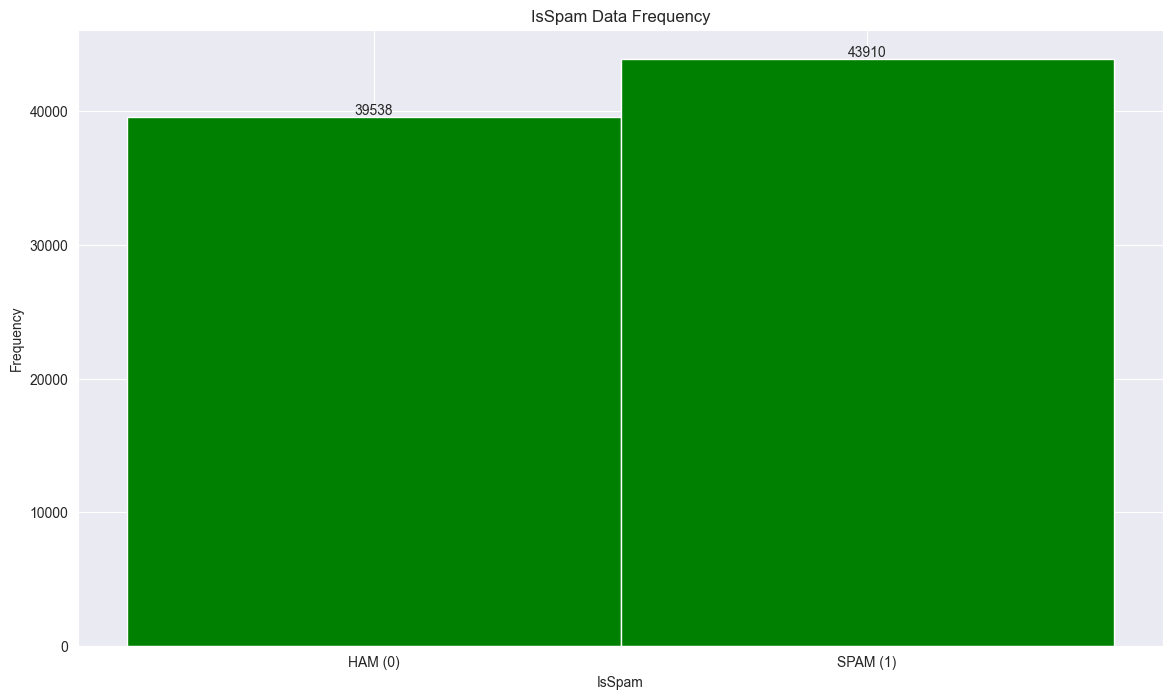

In [130]:
'''
Generate a Histogram Chart to visual display HAM(0) vs SPAM(1) balance
'''
is_spam_label = ['HAM (0)', 'SPAM (1)']

hist_data = labeled_emails['IsSpam'].hist(bins=(0,1))
bins = hist_data['break_point'].to_numpy()[:-1].astype(int)
counts = hist_data['IsSpam_count'].to_numpy()[:-1].astype(int)

plt.figure(figsize=(14,8))

#values to place inside bar
for index, value in enumerate(counts):
    plt.text(bins[index], value, str(value), ha='center', va='bottom')

plt.bar(bins, counts, width=1, color='green')
plt.xlabel('IsSpam')
plt.xticks(ticks=bins, labels=is_spam_label)
plt.ylabel('Frequency')
plt.title('IsSpam Data Frequency')
plt.show()

In [131]:
'''
Calculate percentage of HAM(0) vs SPAM(1) to pair with visual balance check.
'''
total_results = (counts[0] + counts[1])
ham_percentage = counts[0] / total_results
spam_percentage = counts[1] / total_results

ham_percentage_formatted = "{:.2f}".format(ham_percentage * 100)
spam_percentage_formatted = "{:.2f}".format(spam_percentage * 100)

balance_results = f'''
Percentages:
------------
 HAM(0): {ham_percentage_formatted}%
SPAM(1): {spam_percentage_formatted}%
'''
print(balance_results)


Percentages:
------------
 HAM(0): 47.38%
SPAM(1): 52.62%


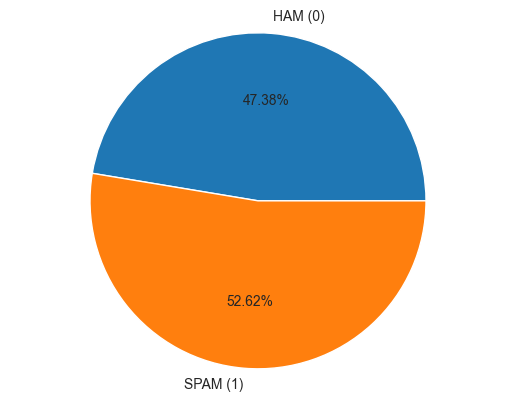

In [132]:
'''
Visualization of the calculated percentages of IsSpam.
'''
plt.pie([ham_percentage, spam_percentage], labels=is_spam_label, autopct='%.2f%%')
plt.axis('equal')
plt.show()

### Pre-Processing EmailContent (text) for Vectorization/Embedding

In this phase, we will undertake the professional preprocessing of `EmailContent`, which inherently possesses an unstructured format due to its origin as email text. The process will involve the meticulous removal of special characters and stop words. This refinement is essential to enable the model to concentrate more effectively on the critical components of the email text content.

In [133]:
def preprocess_text(text:str) -> str:
    """
    :param text: Content that needs to be cleaned before vectorization/embeddings
    :type text: str
     
    :return: Cleaned Content
    """
    
    text = text.lower()
    text = unidecode(text) #normalization. Dealing with things like accents
    text = emoji.demojize(text) #fix emojis
    text = re.sub(r'[^\w\s]', '', text) #remove punctuations
    
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    
    filtered = list()
    for word in tokens:
        if word not in stop_words:
            filtered.append(word)
    
    processed_text = ' '.join(filtered)
    return processed_text


In [134]:
preprocessed_labeled_emails = labeled_emails.with_columns(
    labeled_emails['EmailContent'].map_elements(preprocess_text)
                                  .alias('PreProcessed_EmailContent')
)

check_expected_row(preprocessed_labeled_emails)
missing_values_check(preprocessed_labeled_emails)

preprocessed_labeled_emails.head(n=5)

Checking [IsSpam] for missing values...
[IsSpam] has no missing values.
Checking [EmailContent] for missing values...
[EmailContent] has no missing values.
Checking [PreProcessed_EmailContent] for missing values...
[PreProcessed_EmailContent] has no missing values.


IsSpam,EmailContent,PreProcessed_EmailContent
i64,str,str
1,"""hello , how ar…","""hello better s…"
0,"""maybe you're l…","""maybe youre lo…"
0,""" begin pgp sig…","""begin pgp sign…"
0,""" why filename …","""filename xmp b…"
1,"""lynnette just …","""lynnette told …"


<a id="analysis"></a>
# D: Analysis
>  Report on your data-analysis process by describing the analysis technique(s) you used to appropriately analyze the data. Include the calculations you performed and their outputs. Justify how you selected the analysis technique(s) you used, including one advantage and one disadvantage of these technique(s).

<a id="data-summary-and-implications"></a>
# E: Data Summary and Implications
>Summarize the implications of your data analysis by discussing the results of your data analysis in the context of the research question, including one limitation of your analysis. Within the context of your research question, recommend a course of action based on your results. Then propose two directions or approaches for future study of the data set.

<a id="sources"></a>
# F: Sources
>Acknowledge sources, using in-text citations and references, for content that is quoted.

* PURU SINGHVI. (n.d.). Spam Email Classification Dataset Kaggle.
  Retrieved from https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset
  <br /><br />
  
* GitHub. (n.d.). About large files on GitHub. GitHub Docs. 
  Retrieved from https://docs.github.com/en/repositories/working-with-files/managing-large-files/about-large-files-on-github
  <br /><br />